# Data Cleaning and Analysis of the Bengaluru Zomato Dataset

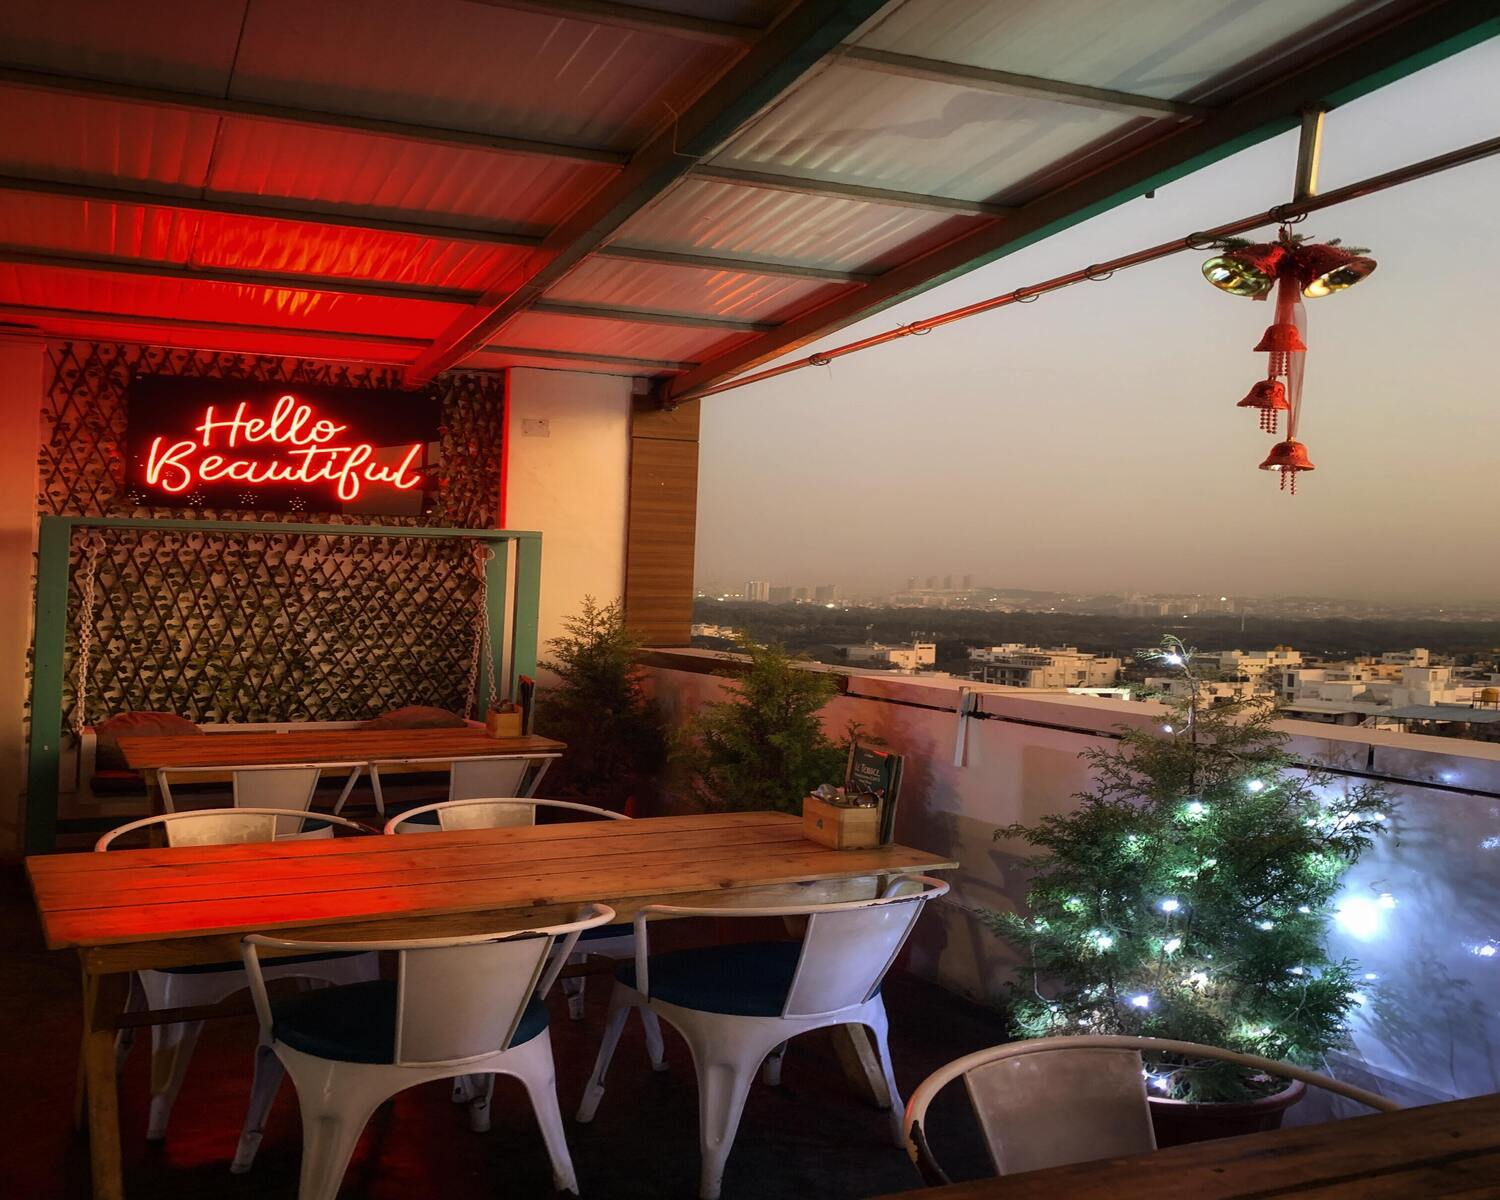

### Introduction :-
<p style="font-size:110%; color:Black;">In this notebook, I am going to be cleaning and analysing the <a href='https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants'>Zomato Bangalore Dataset</a> created by <a href='https://www.kaggle.com/himanshupoddar'>Himanshu Poddar.</a> We have 51717 rows and 17 columns in this dataset whereas Bengaluru has around 12,000 restaurants. While explaining the process of creating the dataset Himanshu explains that he extracted the url, name and the address of the restaurant in the Phase 1 and then the rest of the  information has been pulled category wise. This probably means that if a restaurant is listed in more than one category then there maybe multiple entries for it.</p> 

### Dataset :-
<p style="font-size:110%; color:Black;">Information about the dataset columns:
<ul style="font-size:110%; color:Black;list-style-type:circle;">
    <li><b>url:</b> contains the url of the restaurant in the zomato website</li>
    <li><b>address:</b> contains the address of the restaurant in Bengaluru</li>
    <li><b>name:</b> contains the name of the restaurant</li>
    <li><b>online_order:</b> whether online ordering is available in the restaurant or not</li>
    <li><b>book_table:</b> whether the option to book table is available or not</li>
    <li><b>rate:</b> contains the overall rating of the restaurant out of 5</li>
    <li><b>votes:</b> contains total number of ratings given for the restaurant as of the above mentioned date (15th March 2019)</li>
    <li><b>approx_cost(for two people):</b> approx amount spend by two people when eating at the restaurant</li>
    <li><b>location:</b> area in which restaurant is located</li>
    <li><b>rest_type:</b> type of restaurant</li>
    <li><b>cuisines:</b> type of food the restaurant sells</li>
    <li><b>listed_in(type):</b> category in which the restaurant is listed in the Zomato app</li>
</ul>
Now that we have a basic idea about the dataset let us get started. 😊    
</p>




In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
pd.set_option('display.max_colwidth', 100)

In [ ]:
# Read the data and make a visual assessment
zomato_df= pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
zomato_df.head(5)

## Assess the Data

### General Assessment

In [ ]:
#dataset size
zomato_df.shape

In [ ]:
#list the names of columns
zomato_df.columns

In [ ]:
# Get information about the dataset
zomato_df.info()

In [ ]:
#Number of unique values in each column
zomato_df.nunique()

<p style='font-size:110%;'>When examining the unique data in each column we can see that 'url' has unique value 51717 whereas 'address' column has value 11495. This indicates that there are 11495 restaurants listed in Zomato. The different urls for the same restaurants are because some restaurants maybe listed in multiple categories in Zomato. Unique values for the 'name' column is 8792 which is less than the number of restaurants listed. The reason could be that some restaurants might be having franchisee/branches in different locations. Let us further assess the data to find more informtion. 👇</p>

### Find the number of Restaurants 

In [ ]:
#find addresses which have multiple urls
zomato_df.address.value_counts()

<p style='font-size:110%;'>We can see that a few of the addresses that have a number of repeats are those of hotels. Let us use the address , The Ritz-Carlton, 99, Residency Road, Bangalore, to find if there are multiple restaurants in 'The Ritz-Carlton' or that all the urls are for the same restaurant.
We can also observe that there are 128 rows with missing address as they are "Delivery Only".</p>

In [ ]:
#check if the multiple urls for a single address belong to a single restaurant
zomato_df.query('address == "14th Main, 4th Sector, HSR, Bangalore"')['name'].unique()

In [ ]:
#check if Ritz-Carlton has more than one restaurant in the same location
zomato_df.query('address == "The Ritz-Carlton, 99, Residency Road, Bangalore"')['name'].unique()

<p style='font-size:110%'>We can see that the address The Ritz-Carlton, 99, Residency Road, Bangalore houses multiple restaurants and there maybe be many similar cases as many star hotels have multiple inhouse restaurants in them. Similarly there are many different restaurants in a mall, each having the same address.</p>
<p style='font-size:110%;'>Edit: My initial assessment was that since there are 11495 unique addresses so we have that many restaurants but there are some restaurants which have the same address/location because they are located in a mall or a part of a star hotel. We also have restaurants which have branches/franchisees' in different locations.</p>

In [ ]:
#find the number of unique restaurants 
'''reason for using 'name','address'and location for groupby is that there are restaurants with same 
name and address "Delivery only" but have branches in different locations'''
zomato_df.groupby(['name','address','location']).nunique().sort_values(by='url', ascending=False).shape

<p style='font-size:110%;'>On further Assessment we can see that there are 12519 restaurants and each unique address does not signify a unique restaurant.</p>

### Find the % of Data missing in each column

In [ ]:
#list of the number of missing values in each column
missing_value_count =zomato_df.isnull().sum()
missing_value_count

In [ ]:
#calculate the percentage of missing values in columns which have missing values
#this will help us decide how we deal with missing values
for col in zomato_df.columns:
    total_cells =(zomato_df.shape)[0]
    missing_cells =  zomato_df[col].isnull().sum()
    percentage_missing = (missing_cells/total_cells)*100
    print (col + " : ", percentage_missing)

### Add a new feature: Number of urls/entries each unique restaurant has

In [ ]:
#let us create a new column 'url_count' which is a count of the number of entries for each restaurant
zomato_df['url_count']=zomato_df.groupby(['name','address','location'])['url'].transform('count')

In [ ]:
#change the datatype of 'url_count' column to integer
zomato_df['url_count'] = zomato_df['url_count'].astype('Int64')
assert zomato_df['url_count'].dtype  == 'Int64'

## Clean the Data

### 1. Remove columns that are not required or have more than 50% missing values

<p style='font-size:110%'>On manual observation we can observe that the columns 'url' and 'phone' are not valuable to our analysis so we will drop them. As we can see above, the 'dish_liked' column has more than 50% missing values. Hence we will drop the column.</p>

In [ ]:
#create a copy of the original dataframe
new_zomato = zomato_df.copy()
#drop the columns 'url' ,'phone' and 'dish_liked'
new_zomato = new_zomato.drop(['url', 'phone', 'dish_liked'], axis =1)

### 2. Change column names where required

In [ ]:
#We will change names of columns 'approx_cost(for two people)' to 'cost' , 'listed_in(type)' to 'type_of_rest'
# and 'listed_in(city)' to 'city'
new_zomato.rename(columns = {'approx_cost(for two people)':'cost','listed_in(type)':'type_of_rest','listed_in(city)':'city'}, inplace = True)
new_zomato.columns

### 3. Cleanup the 'cost' and 'rate' column

In [ ]:
#observe the cost column
new_zomato.cost.unique()

In [ ]:
# remove the , symbol from the data 
new_zomato['cost'] = new_zomato['cost'].str.replace(',','')
# convert to float 
new_zomato['cost'] =new_zomato['cost'].astype(float)
assert new_zomato['cost'].dtype  == 'float'

In [ ]:
#explore the datatypes
new_zomato.rate.unique()

<p style='font-size:110%'>We can see that along with nan we also have 'NEW' and hypen which are non numeric and hence do not give us information about the rating of the restaurant. </p>

In [ ]:
#seggregate the restaurants which are new
new_rest = new_zomato[new_zomato.rate =='NEW']
new_rest.shape

In [ ]:
#find the no of votes when rating is 'NEW'
new_rest.votes.unique()

In [ ]:
# find the no of votes when rating = '-'
eval1 =new_zomato.query("rate =='-'")
eval1.votes.unique()

In [ ]:
#let us find the type_of_rest which have hypen value in the rate column
eval1.type_of_rest.value_counts(100)

<p style='font-size:110%;'>We can see that around 71% restaurants which have hypen in rate column belong to the 'Delivery' type of restaurant. </p>

In [ ]:
eval1.rest_type.value_counts(100)

<p style='font-size:110%;'>In the rest_type also, restaurants which have hypen in rate column belong to either Quick Bites or Delivery category (around 73%) </p>

In [ ]:
# Find the number of votes when rating is missing
eval2 =new_zomato[new_zomato.rate.isnull()]
eval2.votes.value_counts(100)

<p style='font-size:110%'>We can see that in most cases 'rate' column has missing values/-/'NEW' when number of votes is 0. </p>

In [ ]:
eval2.type_of_rest.value_counts(100)

In [ ]:
eval2.rest_type.value_counts(100)

<p style='font-size:110%;'>We can see that more than 50% restaurants which have nan values for rate column belong to 'Delivery' type of rest and around 69% have rest_type Quick Bites, Delivery or Takeaway</p>

In [ ]:
#filter rows which have rate 'NEW','-' or nan
missing_rate= new_zomato[new_zomato['rate'].isin(['NEW','-',np.nan])]
missing_rate.sample(4)

In [ ]:
#clean the rate column 
def clean_rate(x):
    if (x == 'NEW' or x =='-'):
        return np.nan
    else:
        x = str(x).split('/')[0]
        return x
    
new_zomato['rate'] = new_zomato.rate.apply(lambda row:clean_rate(row))

In [ ]:
#convert rate column to datatype float
new_zomato['rate']=new_zomato['rate'].astype(float)
assert new_zomato['rate'].dtype == 'float'

In [ ]:
new_zomato.rate.unique()

<p style='font-size:110%;'>When assessing the missing values of rate column we can see that most entries which have 'NEW', hypen or nan values for rate column also have value zero for votes column. Keeping this in mind I am filling all rate values as 0 if votes = 0. This is also important because entries having missing values for rate column have higher % of restaurants which are of type delivery or Quick Bites. </p>
<p style='font-size:110%;'>For entries where the number of votes >0 and rate column has missing data it indicates that the rate column value has not been successfully retrieved. We can see that less than 1% of missing values fall in this category, hence we can either drop these rows or fill these with mean value. I will be filling these with mean rate column value. </p>
<p style='font-size:110%;'> </p>

In [ ]:
#when value of rate is missing then in most cases votes = 0, so for those cases we will fill rate = votes =0
new_zomato.loc[(new_zomato['rate'].isna()) & (new_zomato['votes'] == 0), 'rate'] = new_zomato['votes']

In [ ]:
#calculate the mean rate considering all values which != 0
zomato_mean_rate=new_zomato[new_zomato.rate !=0].rate.mean()
zomato_mean_rate

In [ ]:
# handle missing values in rate column when votes !=0
new_zomato['rate'].fillna(zomato_mean_rate, inplace=True)
assert new_zomato.rate.isnull().sum()== 0

In [ ]:
#round off rate values to 2 decimal places
new_zomato['rate'] = new_zomato['rate'].round(decimals =2)

### 4. Replace yes and no with 1 and 0 respectively in 'order_online' and 'book_table' columns

In [ ]:
#replace Yes with 1 and No with 0 in 'order_online' and 'book_table' columns
mapping ={'Yes': True , 'No' : False}
new_zomato =new_zomato.replace({'online_order': mapping , 'book_table': mapping})
new_zomato.sample(2)

### 5. Missing values in 'location' column

In [ ]:
#assess the rows which have missing values for location column
loc_null = new_zomato[new_zomato.location.isnull()]

Our assessment shows that rows which have missing values for location column also have data missing in other columns like 'rest_type', 'cuisine' , 'cost' etc.

In [ ]:
#number of rows with missing location data
loc_null.shape[0]

In [ ]:
#Since rows having missing location column also have missing data in other columns like
#rest_type, cost cuisines etc , we will drop the rows
new_zomato = new_zomato.dropna(subset =['location'])
assert new_zomato.location.isnull().sum() == 0

###  6. Missing values in 'cost', 'cuisines' and 'rest_type' column

In [ ]:
# function to pull missing values in one column based on either 'name' column 
'''Since there are a number of repeat orders for many restaurants we can pull values of cost , cuisine 
and rest_type columns from rows where values are not missing. In some cases data is not retrievable
and hence we will still have some missing values
col1 - column which has missing values
col2 - column 'name'  
df - dataframe
'''
def fill_missing_values(df ,col1 ,col2):
    missing_val = df[df[col1].isnull()]
    pull_val =df[df[col2].isin(missing_val[col2])]
    pull_list = pull_val[~pull_val[col1].isnull()]
    pull_list = pull_list.drop_duplicates(subset =[col2])
    s = pull_list.set_index(col2)[col1].dropna()
    df[col1] =df[col1].fillna(df[col2].map(s))
    print("Missing values remaining: "+str(df[col1].isnull().sum()))
   

In [ ]:
# use 'address' column to identify same restaurants and pull value for 'cost' column from rows in 
# which data is not missing
fill_missing_values(new_zomato, 'cost','name')

In [ ]:
# use 'address' column to identify same restaurants and pull value for 'rest_type' column from rows in 
# which data is not missing
fill_missing_values(new_zomato,'rest_type' ,'name')

In [ ]:
# use 'name' column to identify same restaurants and pull value for 'cuisine' column from rows in 
# which data is not missing
fill_missing_values(new_zomato, 'cuisines', 'name')

### 7. Finding fuzzy matches in rest_type column

In [ ]:
#find the unique values of rest_type
new_zomato.rest_type.unique()

We can see that 'Cafe, Casual Dining' and 'Casual Dining, Cafe' are one and the same and we will use fuzzywuzzy to identify such matches and make required changes to maintain consistency in data.

In [ ]:
#import fuzzywuzzy 
import fuzzywuzzy
from fuzzywuzzy import fuzz, process

In [ ]:
# list rest_type values with more than one word
choices = new_zomato[new_zomato.rest_type.str.contains(',', na=False)].rest_type.unique()

In [ ]:
#use process.extract to find 10 closest matches
possibilities = process.extract('Cafe, Casual Dining', choices,limit =10, scorer =fuzz.token_sort_ratio)

In [ ]:
#list matches for score above 70
[possible for possible in possibilities if possible[1] > 70]

We can see above that same values with different word order have a score of 100. Hence we will use the score 100 to make changes in our dataset

In [ ]:
#sort values in choices to identify values which are in reverse word order but are the same

np.sort(choices)

In [ ]:
# create a categories dataframe containing the correct categories of each rest_type with no repeats
changes = ['Cafe, Casual Dining', 'Cafe, Quick Bites', 'Beverage Shop, Quick Bites','Bakery, Cafe',
          'Bakery, Dessert Parlor','Bakery, Quick Bites', 'Bar, Cafe', 'Bar, Casual Dining',
          'Bar, Lounge', 'Bar, Pub', 'Beverage Shop, Dessert Parlor', 'Beverage Shop, Quick Bites',
          'Cafe, Casual Dining', 'Cafe, Dessert Parlor', 'Cafe, Lounge', 'Cafe, Quick Bites',
          'Casual Dining, Lounge', 'Casual Dining, Microbrewery', 'Casual Dining, Pub', 
           'Dessert Parlor, Food Court', 'Dessert Parlor, Quick Bites', 'Dessert Parlor, Sweet Shop',
          'Food Court, Quick Bites', 'Lounge, Microbrewery', 'Mess, Quick Bites', 'Microbrewery, Pub'
          ,'Quick Bites, Sweet Shop']
categories =pd.DataFrame(changes, columns=['cat_rest_type'])

In [ ]:
#categories dataframe
categories.head()

In [ ]:
#for each category 
for type in categories['cat_rest_type']:
    #find potential matches of type of rest with different word order
    matches = process.extract(type, new_zomato['rest_type'], limit=new_zomato.shape[0],scorer =fuzz.token_sort_ratio)
    #for each match
    for match in matches:
        #if score is 100 i.e, same words in different orders
        if match[1] == 100:
            #replace rest_type if it is same word with different order
            new_zomato.loc[new_zomato['rest_type']==match[0], 'rest_type'] =type

In [ ]:
#check if rest_type column has been suitably cleaned
np.sort(new_zomato[new_zomato.rest_type.str.contains(',', na=False)].rest_type.unique())

<p style='font-size:110%;'>We can see that the rest_type column has been cleaned and there are no two values which are same but in reverse word order</p>

### 8. Feature Engineering: Create new columns rate_max, votes_max, votes_diff and max_cost

In [ ]:
#Since there are multiple entries for same restaurant we will create a column to document the max value of rate
new_zomato['rate_max']=new_zomato.groupby(['name','address','location'])['rate'].transform('max')

In [ ]:
#Since there are multiple entries for same restaurant we will create a column to document the max value of votes
new_zomato['votes_max']=new_zomato.groupby(['name','address','location'])['votes'].transform('max')

In [ ]:
#Since there are multiple entries for same restaurant we will create a column to document the min value of votes
new_zomato['votes_min']=new_zomato.groupby(['name','address','location'])['votes'].transform('min')

In [ ]:
'''Since there are multiple entries for same restaurant and entries taken at later date in some cases
have more votes I have created a column with the difference in votes between max and min'''

new_zomato['votes_diff']=new_zomato['votes_max'] - new_zomato['votes_min']

In [ ]:
new_zomato['max_cost']=new_zomato.groupby(['name','address','location'])['cost'].transform('max')

### 9. Create a new Dataframe without repeat entries for same restaurant 

In [ ]:
#create a new dataframe without repeat entries 
zomato_unique = new_zomato.drop_duplicates(subset=['name','address','location'], keep='last')
zomato_unique.shape

In [ ]:
#drop extra columns which are not required
# city ,votes_min
zomato_unique = zomato_unique.drop(['city', 'votes_min'], axis = 1)

## Analysis

In [ ]:
#!pip install plotly==5.1.0

In [ ]:
#import necessary libraries
from plotly import tools
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Distribution of Restaurants with/without online order facility
</div>


In [ ]:
  #Plot a pie-chart which shows the distribution of online orders     
colors = ['gold', 'mediumturquoise']
#create a copy of zomato_unique dataset
df=zomato_unique.copy()
#to change labels we make changes in dataset
#replace 1 with 'Yes' and 0 with 'No' in 'order_online' and 'book_table' columns
mapping ={ True:'Yes' , False: 'No' }
df_string =df.replace({'online_order': mapping , 'book_table': mapping})
online_counts = df_string.online_order.value_counts(sort=True)
labels =online_counts.index
values = online_counts.values

pie = go.Pie(labels=labels, values=values,name='',hovertemplate = "%{label}: <br>Percentage: %{percent} </br> %{value}")
layout = go.Layout(title='Distribution of online orders', title_x=0.5)
fig = go.Figure(data=[pie], layout=layout)


fig.update_traces(hoverinfo='label+percent', textposition ='auto', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(legend_title_text='Online Orders')

py.iplot(fig)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Distribution of Restaurants with/without book table facility
</div>

In [ ]:
#Plot a pie chart to show distribution of book table option in restaurants
colors = ['#CB4335' ,'#34495E' ]
table_counts = df_string.book_table.value_counts(sort=True)
labels =table_counts.index
values = table_counts.values

pie = go.Pie(labels=labels, values=values, name='',
             hovertemplate = "%{label}: <br>Percentage: %{percent} </br> %{value}")
layout = go.Layout(title='Distribution of Restaurants with Table Booking Option', title_x=0.5, legend={'traceorder':'reversed'})
fig = go.Figure(data=[pie], layout=layout)


fig.update_traces(hoverinfo='label+percent', textposition ='auto', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(legend_title_text='Book Table')

py.iplot(fig)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Popular Locations with most Number of Restaurants 
</div>

In [ ]:
# Plot the locations which have more restaurants
fig = px.histogram(zomato_unique, x='location',height =800 , width =1000, color_discrete_sequence=['#138D75']).update_xaxes(categoryorder="total descending")

fig.update_layout(
    title_text='Number of restaurants in each Location', # title of plot
    xaxis_title_text='Location', # xaxis label
    yaxis_title_text='Number of Restaurants', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    #hovermode ='x',
    title_x=0.5,
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)


py.iplot(fig)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Top 30 Most Popular Food Chains in Bengaluru
</div>

In [ ]:
#Plot the top 30 Restaurants with more number of franchisees
franchisee_count = zomato_unique.groupby(['name']).size().to_frame().sort_values([0], ascending = False).head(30).reset_index()
franchisee_count.columns = ['name', 'count']
fig = px.histogram(franchisee_count, x='name',y='count',height =800 , width =1000, color_discrete_sequence=['#EC7063'])
fig.update_layout(
    title_text="Top 30 Franchisees' in Bengaluru  ", # title of plot
    xaxis_title_text='Name of Restaurant', # xaxis label
    yaxis_title_text='Number of Outlets', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    #hovermode ='x',
    title_x=0.5,
    hoverlabel=dict(
        bgcolor="lightblue",
        font_size=16,
        font_family="Georgia"
    )
)
py.iplot(fig)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Distribution of Restaurants based on the category (restaurant type)
</div>

In [ ]:
#Plot a pie chart showing the different types of restaurant in Bangalore 
type_colors = ['#85C1E9 ','#F7DC6F','#2874A6','#EC7063','#AEB6BF','#BB8FCE ','#FA8072' ]
rest_counts = df.type_of_rest.value_counts(sort=True)
labels =rest_counts.index
values = rest_counts.values

pie = go.Pie(labels=labels, values=values, marker_colors=type_colors,
             hovertemplate = "%{label}: <br>Percentage: %{percent} </br> %{value}"+'<extra></extra>')
layout = go.Layout(title='Distribution of Types of Restaurants', title_x=0.5, legend={'traceorder':'reversed'})
fig = go.Figure(data=[pie], layout=layout)


fig.update_traces(hoverinfo='label+percent', textposition ='auto', textinfo='value', textfont_size=20)
fig.update_layout(legend_title_text='Type of Restaurant')

py.iplot(fig)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> How expensive are restaurants in Benguluru?
</div>

In [ ]:
#Plot a Histogram to show cost distribution of restaurants
from plotly.subplots import make_subplots
df=zomato_unique.dropna(subset =['cost'])

fig = make_subplots(rows =3, cols =1, subplot_titles=("Cost Distribution","Cost Distribution for Range:0-3000","Cost Distribution for Range:3000-6000"))
fig.add_trace(go.Histogram(x =df['cost'],nbinsx =20, name='Cost Distribution',hovertemplate='<b>No of Rest</b>: %{y}'+'<br><b>Cost</b>: %{x}<br>'+'<extra></extra>'), row=1, col=1)
fig.update_xaxes(title_text="Cost for 2 people", row=1, col=1)
fig.update_yaxes(title_text="Number of Restaurants",row=1, col=1)
fig.add_trace(go.Histogram(x=df['cost'], nbinsx =20, name="Cost(Rs):0-3000",hovertemplate='<b>No of Rest</b>: %{y}'+
    '<br><b>Range</b>: %{x}<br>'+'<extra></extra>') ,row=2, col=1)
fig.update_xaxes(title_text="Cost (range:0-3000)", range=[0, 3030], row=2, col=1)
fig.update_yaxes(title_text="Number of Restaurants", row=2, col=1)
fig.add_trace(go.Histogram(x=df['cost'], nbinsx =20, name="Cost(Rs):3000-6000",hovertemplate='<b>No of Rest</b>: %{y}'+
    '<br><b>Range</b>: %{x}<br>'+'<extra></extra>') ,row=3, col=1)
fig.update_xaxes(title_text="Cost (range:3000-6000)", range=[3000, 7050], row=3, col=1)
fig.update_yaxes(title_text="Number of Restaurants", range=[0, 50], row=3, col=1)
fig.update_layout(height=700, width=800, hovermode='x unified', title_text="Subplots:Cost Distribution for different Ranges", title_x=0.5)
py.iplot(fig)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Which types of Restaurants are more popular in Bengaluru?
</div>

In [ ]:
#plot a histogram number of restaurants for each rest_type 
df1=zomato_unique.dropna(subset=['rest_type'])
df1
fig = go.Figure([go.Histogram(x=df1['rest_type'])]).update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of Different Restaurant Types",
    title_x=0.5,
    xaxis_title="Restaurant Types",
    yaxis_title="Count",
    font=dict(
        size=14,
        color="Black"
    )
                  ,height=700, width=900)
py.iplot(fig)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Relation between Rating, Online Order and Book Table
</div>

In [ ]:
#relation between online_order, rate and book_table
df =df_string[df_string.rate >0]
fig = px.box(df, x="online_order", y="rate", color ='book_table', hover_data=['rest_type'])
fig.update_layout(
    title='Relation between Rating, Online Order and Book Table',
    xaxis_title="Online Order",
    title_x=0.5,
    yaxis_title="Rating",
    legend_title="Book Table",
    font=dict(
        family="Rockwell",
        size=14,
        color="#1C2833"
    )
)
py.iplot(fig)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Relation between Cost v/s Rating
</div>

In [ ]:
#Relation between rating and cost
df =zomato_unique.dropna(subset=['cost'])
df_rate1 =df[df.rate_max <=2.0]
df_rate2 =df[(df.rate_max>2.0)&(df.rate_max <=3.0)]
df_rate3 =df[(df.rate_max>3.0)&(df.rate_max <=4.0)]
df_rate4 =df[df.rate_max > 4.0]
fig =go.Figure()
fig.add_trace(go.Scatter(x=df_rate1['cost'], y=df_rate1['rate_max'], name='rating:0.0-2.0', mode='markers',hovertemplate='<b>Rating</b>: %{y}'+
    '<br><b>Cost</b>: %{x}<br>'+'<extra></extra>'+'<b>Votes</b>: %{text}', opacity=0.7, marker =dict(color ='#F1C40F'), text =df_rate1['votes']))
fig.add_trace(go.Scatter(x=df_rate2['cost'], y=df_rate2['rate_max'], name='rating:2.1-3.0', mode='markers', hovertemplate='<b>Rating</b>: %{y}'+
    '<br><b>Cost</b>: %{x}<br>'+'<extra></extra>'+'<b>Votes</b>: %{text}', opacity=0.7, marker =dict(color ='#4A235A'), text =df_rate2['votes']))
fig.add_trace(go.Scatter(x=df_rate3['cost'], y=df_rate3['rate_max'], name='rating:3.1-4.0', mode='markers', hovertemplate='<b>Rating</b>: %{y}'+
    '<br><b>Cost</b>: %{x}<br>'+'<extra></extra>'+'<b>Votes</b>: %{text}', opacity=0.7, marker =dict(color ='#C0392B '), text =df_rate3['votes']))
fig.add_trace(go.Scatter(x=df_rate4['cost'], y=df_rate4['rate_max'], name='rating:4.1-5.0', mode='markers', hovertemplate='<b>Rating</b>: %{y}'+
    '<br><b>Cost</b>: %{x}<br>'+'<extra></extra>'+'<b>Votes</b>: %{text}', opacity=0.7, marker =dict(color ='#1B4F72'), text =df_rate4['votes']))
fig.for_each_trace(
    lambda trace: trace.update(marker_symbol="diamond") if trace.name == "rating:0.0-2.0" else (),
)
fig.for_each_trace(
    lambda trace: trace.update(marker_symbol="triangle-up") if trace.name == "rating:2.1-3.0" else (),
)
fig.for_each_trace(
    lambda trace: trace.update(marker_symbol="star") if trace.name == "rating:3.1-4.0" else (),
)
fig.for_each_trace(
    lambda trace: trace.update(marker_symbol="cross") if trace.name == 'rating:4.1-5.0' else (),
)
fig.update_layout(
    title='Relation between Rating and Cost',
    title_x=0.5,
    xaxis_title="Cost for 2 People",
    yaxis_title="Rating",
    legend_title="Ratings",
    font=dict(
        family="Rockwell",
        size=14,
        color="#1C2833"
    ), width=1000
)
py.iplot(fig)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Relation between Rating v/s Votes v/s Cost
</div>

In [ ]:
#Relation between rate and votes_max and cost
fig = go.Figure(data=go.Scatter(y=df['votes_max'],
                                x=df['rate_max'],
                                mode='markers',
                                marker=dict(
        size=12,
        color=df['cost'], #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True
    ),opacity =0.5 
    ,text =df['type_of_rest'])) # hover text goes here
fig.update_layout(
    title='Relation between Rating, Votes and Cost',
    title_x=0.5,
    xaxis_title="Rating",
    yaxis_title="Votes",
    legend_title="Cost",
    font=dict(
        family="Rockwell",
        size=14,
        color="#1C2833"
    ), height=1000
)

py.iplot(fig)

In [ ]:
dfx =df[['rate_max','votes_max','max_cost']]
cr=dfx.corr(method='kendall')
fig = go.Figure(go.Heatmap(x=cr.columns, y=cr.columns , z=cr.values.tolist()
                          , colorscale='RdBu', zmin=-1, zmax=1))
py.iplot(fig)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Top 5:Most voted, Highest Rated , Most Expensive, Popular Restaurant Types , Popular Budget Friendly Restaurants and Most Popular Cuisines
</div>

In [ ]:
#top 5 most voted restaurants
most_voted = zomato_unique.groupby(['name']).votes.sum().to_frame().sort_values(by='votes', ascending = False).head(5).reset_index()
most_voted.columns = ['name', 'votes']


In [ ]:
# top 5 restaurants with highest average rating
zomato_unique = zomato_unique.replace(to_replace =['SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine'],
                      value ='Santa Spa Cuisine')
highest_rating = zomato_unique.groupby(['name','cost']).rate.mean().to_frame().sort_values(by='rate', ascending = False).head(5).reset_index()
highest_rating.columns =['name','cost', 'avg_rating']
highest_rating

In [ ]:
#top 5 most expensive restaurants
dfc = zomato_unique.dropna(subset=['cost'])
most_expensive = dfc.groupby(['name','rate']).cost.mean().to_frame().sort_values(by='cost', ascending = False).head(5).reset_index()
most_expensive.columns =['name','rate','avg_cost']
most_expensive

In [ ]:
#top 5 most popular restaurant types
top_rest_type = zomato_unique.groupby(['rest_type']).size().to_frame().sort_values([0], ascending = False).head(5).reset_index()
top_rest_type.columns = ['rest_type', 'count']
top_rest_type

In [ ]:
#top 5 most budget friendly restaurants with rating above 4.5
high_rating = dfc[dfc.rate >4.5]
budget_friendly = high_rating.groupby(['name','rate']).cost.mean().to_frame().sort_values(by='cost', ascending = True).head(5).reset_index()
budget_friendly.columns =['name','rate','avg_cost']
budget_friendly

In [ ]:
#top 10 cuisines
top_cuisines = zomato_unique.groupby(['cuisines']).size().to_frame().sort_values([0], ascending = False).head(5).reset_index()
top_cuisines.columns = ['cuisine', 'count']
top_cuisines

In [ ]:
fig = make_subplots(
    rows=3, cols=2, subplot_titles=('Most Voted','Most Popular Restaurant Type','Highest Rated',
                                   'Budget Friendly with High Rating','Most Expensive','Popular Cuisines')
    )

fig.add_trace(go.Bar(x=most_voted['name'] ,y=most_voted['votes'] ,marker=dict(color="crimson"),
                     hovertemplate ='<b>Votes</b>: %{y}'+
    '<br><b>Name</b>: %{x}<br>'+'<extra></extra>', showlegend=False), row=1, col=1)
fig.update_xaxes(title_text="Name of Restaurant", row=1, col=1)
fig.update_yaxes(title_text="Votes",row=1, col=1)

fig.add_trace(go.Bar(x=highest_rating['name'] ,y=highest_rating['avg_rating'] ,marker=dict(color="crimson"),
                     hovertemplate ='<b>Average Rating</b>: %{y}'+
    '<br><b>Name</b>: %{x}<br>'+'<extra></extra>'+'<b>Cost</b>: %{text}',text =highest_rating['cost'], showlegend=False), row=2, col=1)
fig.update_xaxes(title_text="Name of Restaurant", row=2, col=1)
fig.update_yaxes(title_text="Average Rating",row=2, col=1)

fig.add_trace(go.Bar(x=most_expensive['name'] ,y=most_expensive['avg_cost'] ,marker=dict(color="crimson"),
                     hovertemplate ='<b>Average Cost</b>: %{y}'+
    '<br><b>Name</b>: %{x}<br>'+'<extra></extra>'+'<b>Rating</b>: %{text}',text =most_expensive['rate'], showlegend=False), row=3, col=1)
fig.update_xaxes(title_text="Name of Restaurant", row=3, col=1)
fig.update_yaxes(title_text="Average Cost",row=3, col=1)

fig.add_trace(go.Bar(x=top_rest_type['rest_type'] ,y=top_rest_type['count'] ,marker=dict(color="crimson"),
                     hovertemplate ='<b>Count</b>: %{y}'+
    '<br><b>Type of Restaurant</b>: %{x}<br>'+'<extra></extra>', showlegend=False), row=1, col=2)
fig.update_xaxes(title_text="Type of Restaurant", row=1, col=2)
fig.update_yaxes(title_text="Count",row=1, col=2)

fig.add_trace(go.Scatter(y=budget_friendly['rate'],
                                x=budget_friendly['name'],
                                mode='markers',
                                marker=dict(
        size=12,
        #color=budget_friendly['avg_cost'], #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        #showscale=True
    ), showlegend =False, hovertemplate ='<b>Rating</b>: %{y}'+
    '<br><b>Name</b>: %{x}<br>'+'<extra></extra>'+'<b>Cost</b>: %{text}'
    ,text =budget_friendly['avg_cost']), row=2, col=2)
fig.update_xaxes(title_text="Name of Restaurant", row=2, col=2)
fig.update_yaxes(title_text="Rating",row=2, col=2)

fig.add_trace(go.Bar(x=top_cuisines['cuisine'] ,y=top_cuisines['count'] ,marker=dict(color="crimson"),
                     hovertemplate ='<b>Count</b>: %{y}'+
    '<br><b>Cuisine</b>: %{x}<br>'+'<extra></extra>', showlegend=False), row=3, col=2)
fig.update_xaxes(title_text="Cuisine", row=3, col=2)
fig.update_yaxes(title_text="Count",row=3, col=2)

fig.update_layout(height=1500, width=900, title_text="Subplots:Top 5 Restaurants", title_x=0.5)

py.iplot(fig)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Top 10 Locations which have new restaurants opening up
</div>


In [ ]:
#Identify Top 10 locations where new restaurants are opening
new_rest1 = new_rest.drop_duplicates(subset=['name','address','location'], keep='last')
dfn =new_rest1.groupby('location').size().to_frame().sort_values([0],ascending =False).head(10).reset_index()
dfn.columns =['location','count']
print(dfn)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Filter established restaurants in top 3 locations where new restaurants are opening
</div>


In [ ]:
# filter restaurants in locations which have most number of new restaurants opening (top 10 locations)
new_rest_loc= zomato_unique[zomato_unique['location'].isin(dfn.location)]
#remove entries of new restaurants so that we can analyse data of existing restaurants in top 10 locations
new_rest_1 = new_rest_loc.loc[~new_rest_loc.index.isin(new_rest.index)]
new_rest_1.shape 

In [ ]:
#filter restaurants which are more popular and have more than 100 votes so that we can study trends 
new_rest_x =new_rest_1[new_rest_1.votes >100]

In [ ]:
#filter the popular restaurants in Electronic City 
explore_ec = new_rest_x.query('location =="Electronic City"')
explore_ec.shape

In [ ]:
#filter the popular restaurants in BTM 
explore_btm = new_rest_x.query('location =="BTM"')
explore_btm.shape

In [ ]:
#filter the popular restaurants in Whitefield 
explore_w = new_rest_x.query('location =="Whitefield"')
explore_w.shape

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Relation between cost and rate, relation between rate,online order and book table in locations:Electronic City, BTM and Whitefield
</div>


In [ ]:
#suplots of relation between cost and rate, relation between rate,online order and book table in different locations
fig = make_subplots(
    rows=3, cols=2, subplot_titles=('Cost v/s rate:Electronic City','Order Online v/s rate: Electronic City','Cost v/s rate: BTM','Order Online v/s rate: BTM','Cost v/s rate: Whitefield','Order Online v/s rate: Whitefield')
    )
fig.add_trace(go.Scatter(x=explore_ec['cost'], y=explore_ec['rate_max'], name='rating:EC', mode='markers',hovertemplate='<b>Rating</b>: %{y}'+
    '<br><b>Cost</b>: %{x}<br>'+'<extra></extra>'+'<b>Votes</b>: %{text}', showlegend=False, opacity=0.7, marker =dict(color ='#F1C40F'), text =explore_ec['votes'])
    ,row =1 ,col =1)
fig.update_xaxes(title_text="Cost for 2 people", row=1, col=1)
fig.update_yaxes(title_text="Rating",row=1, col=1)

fig.add_trace(go.Scatter(x=explore_btm['cost'], y=explore_btm['rate_max'], name='rating:BTM', mode='markers',hovertemplate='<b>Rating</b>: %{y}'+
    '<br><b>Cost</b>: %{x}<br>'+'<extra></extra>'+'<b>Votes</b>: %{text}', showlegend=False, opacity=0.7, marker =dict(color ='#E7361B'), text =explore_btm['votes']),row =2 ,col =1)
fig.update_xaxes(title_text="Cost for 2 people", row=2, col=1)
fig.update_yaxes(title_text="Rating",row=2, col=1)

fig.add_trace(go.Scatter(x=explore_w['cost'], y=explore_w['rate_max'], name='rating:Whitefield', mode='markers',hovertemplate='<b>Rating</b>: %{y}'+
    '<br><b>Cost</b>: %{x}<br>'+'<extra></extra>'+'<b>Votes</b>: %{text}', showlegend=False, opacity=0.7, marker =dict(color ='#5B2C6F'), text =explore_w['votes'])
    ,row =3 ,col =1)
fig.update_xaxes(title_text="Cost for 2 people", row=3, col=1)
fig.update_yaxes(title_text="Rating",row=3, col=1)

fig.add_trace(go.Box(x=explore_ec['online_order'],y=explore_ec['rate'], showlegend=False, marker_color='#F1C40F', hovertemplate ='<b>Rating</b>: %{y}'+
    '<br><b>Online Order</b>: %{x}<br>'+'<extra></extra>'),row =1 ,col =2)
fig.update_xaxes(title_text="Online Orders", row=1, col=2)
fig.update_yaxes(title_text="Ratings",row=1, col=2)

fig.add_trace(go.Box(x=explore_btm['online_order'],y=explore_btm['rate'], showlegend=False, marker_color ='#E7361B', hovertemplate ='<b>Rating</b>: %{y}'+
    '<br><b>Online Order</b>: %{x}<br>'+'<extra></extra>'),row =2 ,col =2)
fig.update_xaxes(title_text="Online Orders", row=2, col=2)
fig.update_yaxes(title_text="Ratings",row=2, col=2)

fig.add_trace(go.Box(x=explore_w['online_order'],y=explore_w['rate'], showlegend=False, marker_color ='#5B2C6F', hovertemplate ='<b>Rating</b>: %{y}'+
    '<br><b>Online Order</b>: %{x}<br>'+'<extra></extra>'),row =3 ,col =2)
fig.update_xaxes(title_text="Online Orders", row=3, col=2)
fig.update_yaxes(title_text="Ratings",row=3, col=2)

fig.update_layout(height=700, width=800, title_text="Subplots:Electronic City/BTM/Whitefield", title_x=0.5)
py.iplot(fig)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Create wordclouds for cuisines, rest_type and menu items for restaurants in locations:Electronic City, BTM and Whitefield
</div>

In [ ]:
#!pip install wordcloud

In [ ]:
#importing all necessary modules
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
def create_word_cloud(df, column):
    comment_words = ''
    stopwords = set(STOPWORDS)
    stopwords.update(['serves','select','worth','buy','free','one','shop'])

    # iterate through the csv file
    for val in df[column]:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
            tokens[i] = tokens[i].replace("'", "")

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                          stopwords = stopwords, colormap="Oranges_r" ).generate(comment_words)

    # plot the WordCloud image  
    font1 = {'family':'serif','color':'black','size':30}
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title('Word Cloud: Explore: {}'.format(column), fontdict =font1)
    plt.tight_layout(pad = 0)
    plt.margins(x=0, y=0)
    plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Create wordclouds for cuisines, rest_type and menu items for restaurants in locations:Electronic City
</div>

In [ ]:
#create wordclouds for location: Electronic City
create_word_cloud(explore_ec, 'cuisines')
create_word_cloud(explore_ec, 'menu_item')
create_word_cloud(explore_ec, 'rest_type')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Create wordclouds for cuisines, rest_type and menu items for restaurants in locations:BTM
</div>

In [ ]:
#create word_clouds for location: BTM
create_word_cloud(explore_btm, 'cuisines')
create_word_cloud(explore_btm, 'menu_item')
create_word_cloud(explore_btm, 'rest_type')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#C39BD3;
           font-size:110%;
           padding:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> Create wordclouds for cuisines, rest_type and menu items for restaurants in locations:Whitefield
</div>

In [ ]:
#create word clouds for location: Whitefield
create_word_cloud(explore_w, 'cuisines')
create_word_cloud(explore_w, 'menu_item')
create_word_cloud(explore_w, 'rest_type')

<p style='font-size:110%;'>Thank you for going through this notebook. Feedback and votes are appreciated.😊 </p>